In [305]:
import pandas as pd
import ROOT as r

In [306]:
data = pd.read_csv('../data/scattering2d_data.csv',index_col=0)

In [307]:
data

,sum,angle
0-10,19,5
10--30,23,20
30-50,18,40
50-70,32,60
70-90,20,80
90-110,31,100
110-130,32,120
130-150,24,140
150-170,34,160
170-190,0,180


In [308]:
data["sum"].sum()

512

In [309]:
data = data[(data.angle>5) & (data.angle<355)]

In [310]:
entries = []
for i in range(len(data)):
    for j in range(data["sum"][i]):
        entries.append(data["angle"][i])

In [311]:

entries

[20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 160,
 160,
 

In [312]:
data["error"] = data["sum"]**0.5
#errors as the square root of the number of entries but integer
errors = []
for i in range(len(data)):
    errors.append(int(data["error"][i]))

data["error"] = errors

/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_22907/1725471886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["error"] = data["sum"]**0.5
/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_22907/1725471886.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["error"] = errors


In [313]:
errors

[4, 4, 5, 4, 5, 5, 4, 5, 0, 5, 5, 5, 5, 4, 4, 5, 9]

 FCN=113.702 FROM MIGRAD    STATUS=CONVERGED      14 CALLS          15 TOTAL
                     EDM=2.23192e-17    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.37009e-02   7.25840e-04   3.00000e-03  -9.20478e-06


Warning in <TROOT::Append>: Replacing existing TH1: Statistics (Potential memory leak).


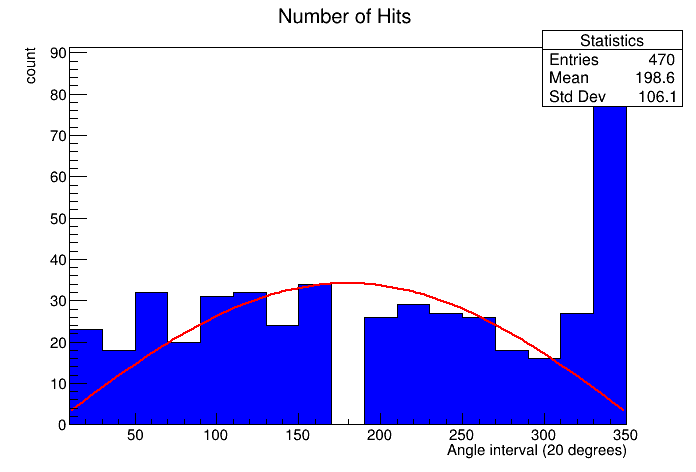

In [314]:
#fill a histogram and plot it in root

h = r.TH1D("Statistics","Number of Hits",17,10,350)
for i in range(len(entries)):
    h.Fill(entries[i])

c = r.TCanvas()

fit = r.TF1("fit","(((20/(0.063/45))*[0]/2)*sin((pi/180)*x/2)*(pi/180)*20)",10,350)
fit.SetParameter(0,10)

# Set the histogram style
h.SetFillColor(r.kBlue)
h.SetLineColor(r.kBlack)

h.GetYaxis().SetTitle("count")
h.GetXaxis().SetTitle("Angle interval (20 degrees)")

h.Fit(fit, "R")

h.Draw()
c.Draw()



In [315]:
(0.028 - fit.GetParameter(0))/(fit.GetParError(0))

19.70013308818113

In [316]:
#Corrections due to missing data on the pressurised paper

In [317]:
n_all_hits_paper = data["sum"].sum()
n_all_hits = 900

norm = n_all_hits_paper/n_all_hits

In [318]:
n_all_hits_paper

470

In [319]:
20*norm

10.444444444444445

 FCN=113.702 FROM MIGRAD    STATUS=CONVERGED      14 CALLS          15 TOTAL
                     EDM=3.94052e-19    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.62468e-02   1.39050e-03   3.00000e-03  -6.38442e-07


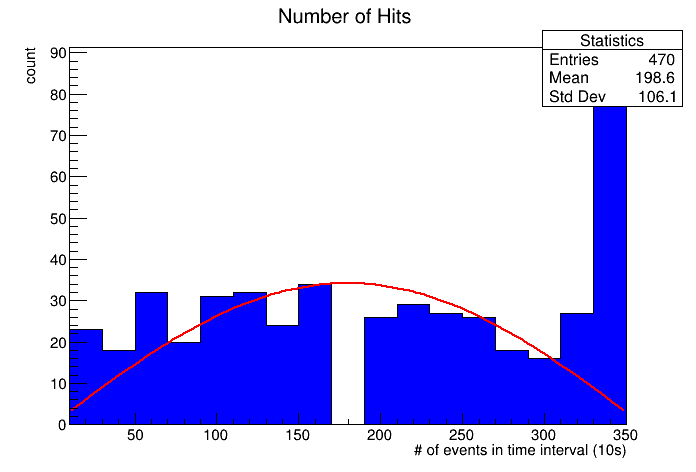

In [320]:
c = r.TCanvas()

fit = r.TF1("fit", "(((10.44/(0.063/45))*[0]/2)*sin((pi/180)*x/2)*(pi/180)*20)", 10, 350)
fit.SetParameter(0, 10)

# Set the histogram style
h.SetFillColor(r.kBlue)
h.SetLineColor(r.kBlack)

h.GetYaxis().SetTitle("count")
h.GetXaxis().SetTitle("# of events in time interval (10s)")

h.Fit(fit, "R")

h.Draw()
c.Draw()



In [321]:
(0.028 - fit.GetParameter(0))/(fit.GetParError(0))

1.2608086031491303

In [322]:
#intergal aproxx

In [323]:
I = 20/(0.063/45)

In [326]:
I_n = 20/(0.063/45)*norm

In [327]:
I_n

7460.317460317461

In [328]:
data

,sum,angle,error
10--30,23,20,4
30-50,18,40,4
50-70,32,60,5
70-90,20,80,4
90-110,31,100,5
110-130,32,120,5
130-150,24,140,4
150-170,34,160,5
170-190,0,180,0
190-210,26,200,5


In [329]:
import numpy as np
sum = 0
for theta in range(20,360,20):
    tmp= np.sin((theta/2*(np.pi/180)))*20*(np.pi/180)
    sum += tmp

In [330]:
sum

3.9898409271669033

In [331]:
r = (2*470)/(I_n*sum)

In [332]:
r

0.031580206404236214